In [6]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [7]:
from fastbook import *
from fastai.vision.widgets import *

Use DuckDuckGo to dowload images

In [9]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [10]:
results = search_images_ddg('Artemis')

Let's look at an image from what we downloaded. 

In [14]:
destination = 'artemis.jpg'
download_url(results[0], destination)

Path('artemis.jpg')

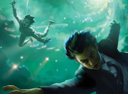

In [16]:
im = Image.open(destination)
im.to_thumb(128,128)

This does not look like the greek goddess Artemis, I need to specify the search more, like using 'greek godess Artemis'. Let's see what does that give. 

In [20]:
restlts_02 = search_images_ddg('greek godess Artemis')

In [22]:
dest_02 = 'artemis02.jpg'
download_url(restlts_02[0], dest_02)

Path('artemis02.jpg')

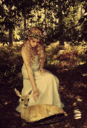

In [23]:
im = Image.open(dest_02)
im.to_thumb(128,128)

That's more like it! Let's start with the 6 main greek gods: Zeus, Posseidon, Hades, Hera, Hestia, Demeter

In [25]:
god_names = 'Zeus', 'Posseidon', 'Hades', 'Hera', 'Hestia', 'Demeter'
path = Path('gods')

In [36]:
if not path.exists():
    path.mkdir()
for o in god_names:
    print(o)
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} greek god')
    download_images(dest, urls=results)

Zeus
Posseidon
Hades
Hera
Hestia
Demeter


In [37]:
fns = get_image_files(path)
fns

(#1162) [Path('gods/Posseidon/6ff26bfe-1137-4e06-bb74-ce2d6505e737.jpg'),Path('gods/Posseidon/eef46946-87c0-445a-8853-6307e30a751e.jpg'),Path('gods/Posseidon/604bbbcc-c4fd-4c11-82e4-d837231e1fc6.jpg'),Path('gods/Posseidon/3c8ab0ea-c815-4173-9a13-03ac300805d9.jpg'),Path('gods/Posseidon/1f90ba32-7905-4681-a0ba-0b0f6d906335.jpg'),Path('gods/Posseidon/b6486022-9fab-475d-bf31-55d4d2a58b48.jpg'),Path('gods/Posseidon/0879ba6e-e6a0-408d-815a-2a54c0fe0306.jpg'),Path('gods/Posseidon/c9cc9fcc-fb8e-4595-b96e-ed9b46cd084b.jpg'),Path('gods/Posseidon/a8c3c1f0-4b20-4664-b742-ee7753578145.jpg'),Path('gods/Posseidon/b8b33b62-f766-4226-92bf-18019780c199.jpg')...]

Delete corrupt files

In [38]:
failed = verify_images(fns)

(#127) [Path('gods/Posseidon/7ccac6f6-72c4-4127-b44f-a6864e33e2d0.jpg'),Path('gods/Posseidon/4a0f2b8b-f82b-4dd0-8182-0edb729b9f74.jpg'),Path('gods/Posseidon/a6ac1f17-8b3b-4cb1-9cd4-2232d763fe1e.jpg'),Path('gods/Posseidon/b388d5af-0383-4cc0-a879-3f08d6f718c7.jpg'),Path('gods/Posseidon/017a5ce6-745d-4d2a-9dc6-fcf7bc2e8a3f.jpg'),Path('gods/Posseidon/f4ab92d6-2c5f-45ae-b211-cc981a01dd47.jpg'),Path('gods/Posseidon/7129acc9-960a-4a35-b587-405558d14ba3.jpg'),Path('gods/Posseidon/6d2573fc-b685-4ff7-afe0-eb39f4225816.jpg'),Path('gods/Posseidon/c82b341c-68b3-4848-9a87-a04e3fed4f90.jpg'),Path('gods/Posseidon/db53b85a-d670-48ff-a25d-b50d2a6a08cd.jpg')...]

In [39]:
failed.map(Path.unlink);

Now we can start training the model on this data. As in the fast.ai book, I start by creating a DataLoader object.

In [40]:
original_gods = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [41]:
#Telling fastai the path where the images are found
dls = original_gods.dataloaders(path)

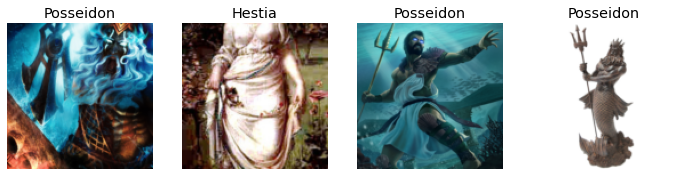

In [43]:
dls.valid.show_batch(max_n = 4, nrows = 1)

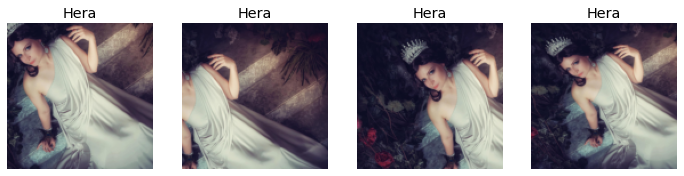

In [44]:
#Instead of resizing the images, do a RandomResizedCrop, to have different parts of every image
otiginal_gods = original_gods.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = original_gods.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Next comes the data augmentation. (I ended up not using RandomResizedCrop as the training took significantly longer with that.)

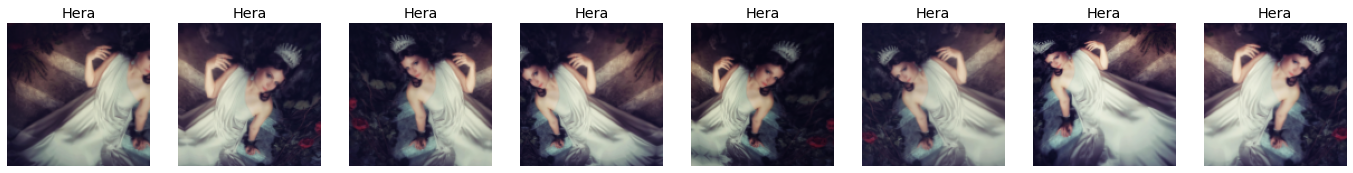

In [51]:
otiginal_gods = original_gods.new(item_tfms=Resize(128), batch_tfms=aug_transforms())
dls = original_gods.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1, unique=True)

Hurray, we can finally train (well, fine tune) our model!

In [52]:
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.734127,2.033140,0.685990,00:58


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,2.051198,1.686283,0.574879,01:16
1,1.768468,1.594039,0.541063,01:12


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency e

Since the model didn't run with more epochs initially, I trained this with 2 epochs now (that also means that the data augmentation didn't matter much, oh well). If the predictions do not work very well, I will come back to it later. 

There are a lot of red messages when training but I do not know why. 

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


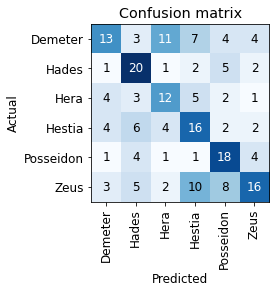

In [53]:
#Confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

There seems to be a large amount of confusion still - maybe we should have more then 2 epochs. Will hget back to this once the model is deployed on HuggingFace.

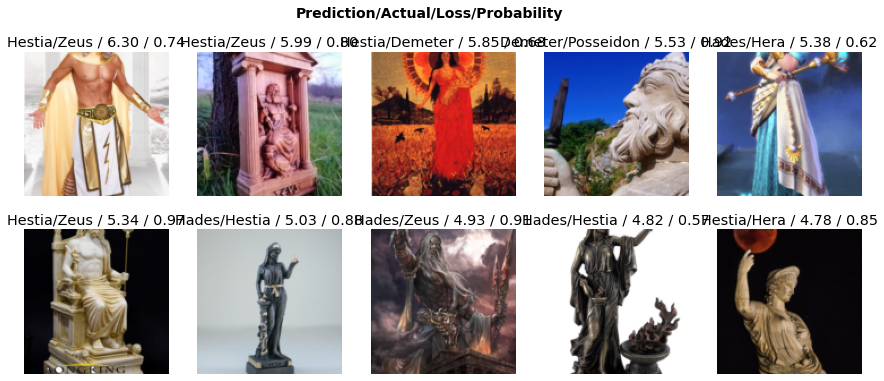

In [55]:
interp.plot_top_losses(10, nrows=2)

In [56]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [58]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [59]:
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.774149,2.036009,0.628019,00:54


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,2.066425,1.607233,0.545894,01:11
1,1.846976,1.464838,0.507246,01:12
2,1.639849,1.453354,0.463768,01:11
3,1.485441,1.422612,0.468599,01:12


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency e

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


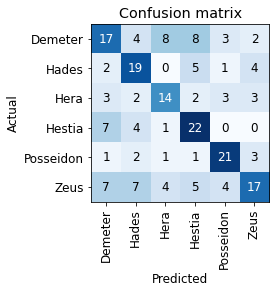

In [60]:
#Confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

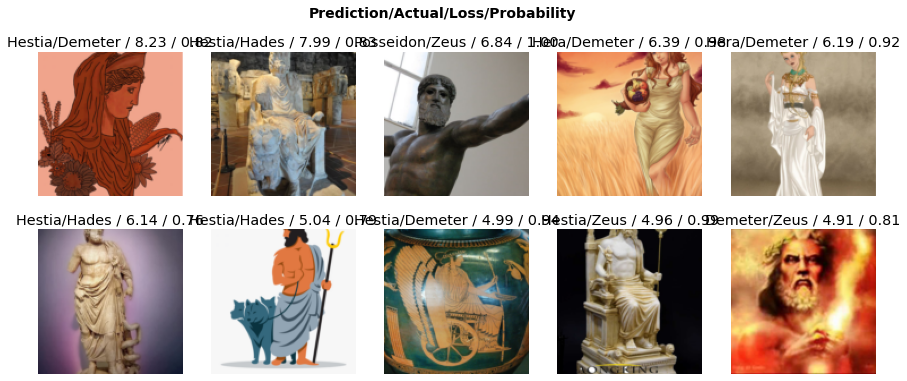

In [61]:
interp.plot_top_losses(10, nrows=2)

Yep, this is still pretty confused. Anyway, I will deploy this for now as a practice.

Export the model first.

In [62]:
learn.path = Path('.')
learn.export()

In [65]:
#In a different notebook, the model needs to be loaded first: learn = load_learner('export.pkl')
labels = learn.dls.vocab

In [66]:
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [71]:
title = 'Greek God Classifier'
description = 'A greek god classifier trained on data from the internet. It classifies images (often inaccurately) of the six main gods'

In [72]:
!import gradio as gr
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3), title = title, description = description).launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://c736abce-5209-47ea.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
